# K-means y hierarchical clustering


In [49]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [50]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [51]:
data.shape

(200, 5)

In [52]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [53]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [54]:
data.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


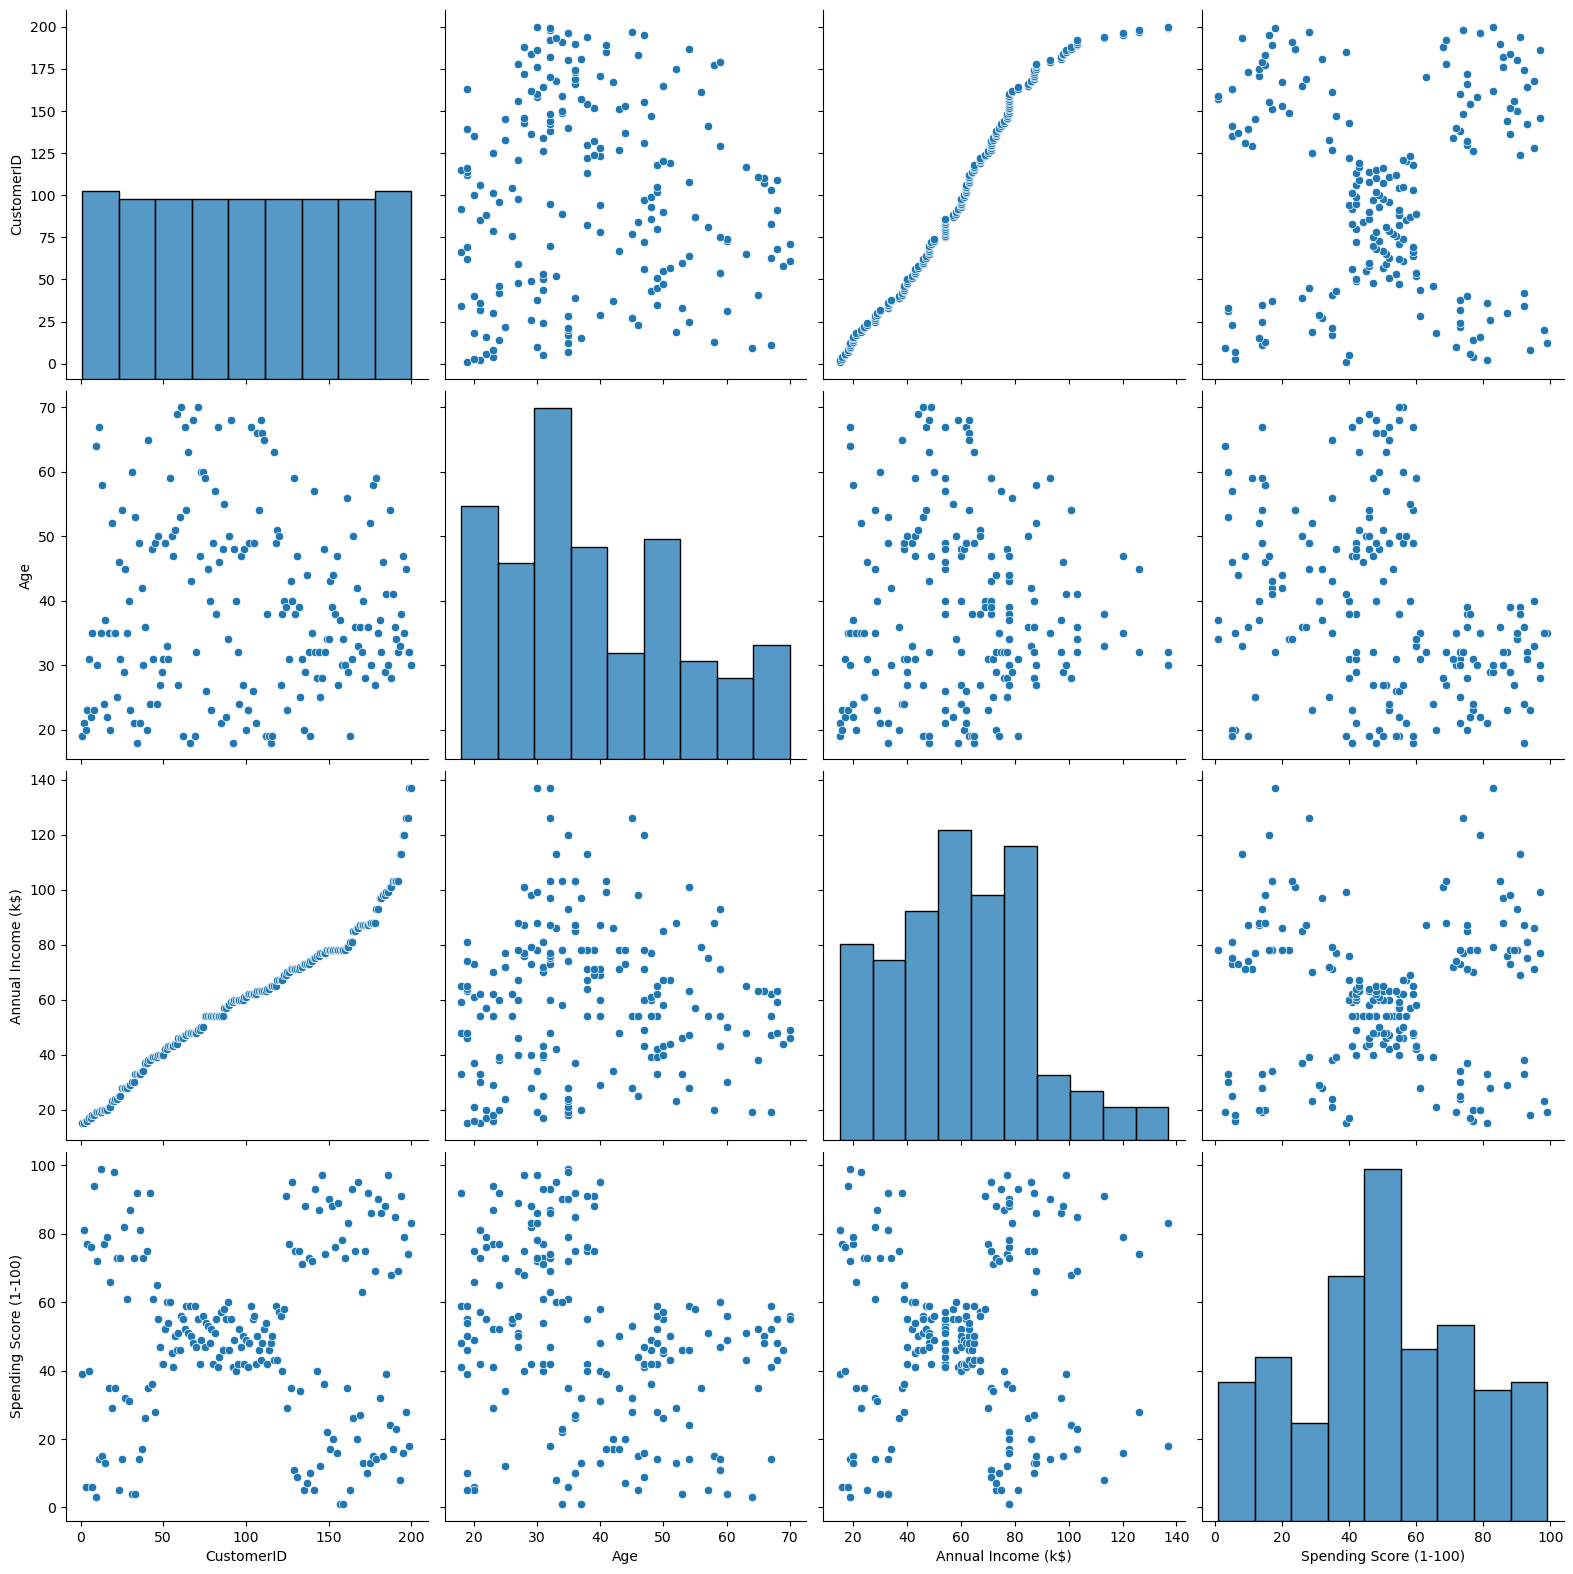

In [55]:
sns.pairplot(data.dropna(), size=4,kind='scatter')

In [56]:
data = pd.get_dummies(data)

In [57]:
# Matriz de correlación
corr_matrix = data.corr()
corr_matrix

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
CustomerID,1.000000,-0.026763,0.977548,0.013835,-0.057400,0.057400
Age,-0.026763,1.000000,-0.012398,-0.327227,-0.060867,0.060867
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903,-0.056410,0.056410
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000,0.058109,-0.058109
Gender_Female,-0.057400,-0.060867,-0.056410,0.058109,1.000000,-1.000000
Gender_Male,0.057400,0.060867,0.056410,-0.058109,-1.000000,1.000000


<Axes: >

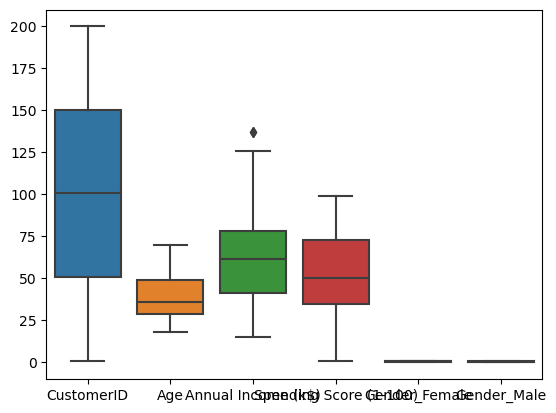

In [58]:
# Diagramas de caja para cada variable por especie
sns.boxplot(data=data)

In [59]:
# Estandarizar los datos antes de aplicar K-Means
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
X

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.723412,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.706091,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.688771,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.671450,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-1.654129,-0.563369,-1.662660,-0.395980,0.886405,-0.886405
...,...,...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061,0.886405,-0.886405
196,1.671450,0.441365,2.497807,-0.861839,0.886405,-0.886405
197,1.688771,-0.491602,2.497807,0.923953,-1.128152,1.128152
198,1.706091,-0.491602,2.917671,-1.250054,-1.128152,1.128152


# K-MEANS

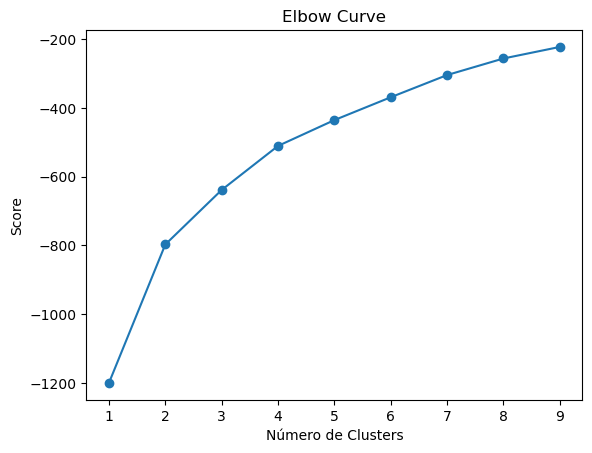

In [61]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [63]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[ 0.88269077, -0.19763442,  0.8088102 ,  0.11840576,  0.88640526,
        -0.88640526],
       [ 0.06475589,  0.06866767,  0.06363885, -0.0655555 , -1.12815215,
         1.12815215],
       [-0.85997398,  0.07057058, -0.79430582, -0.00647026,  0.88640526,
        -0.88640526]])

In [64]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row]) 

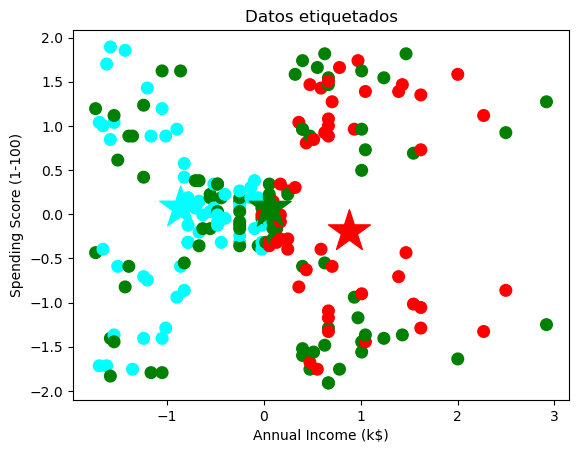

In [65]:
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

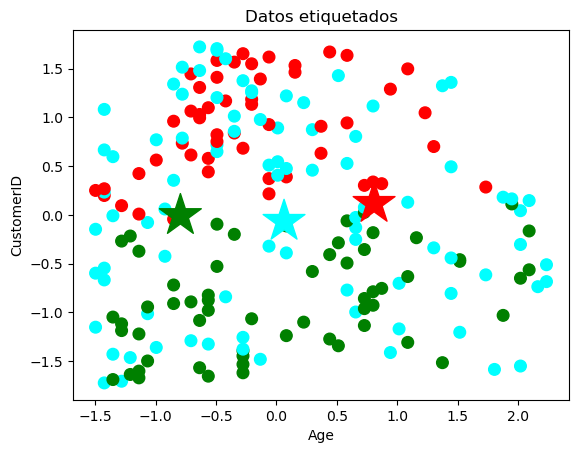

In [27]:
f1 = X['Age'].values
f2 = X['CustomerID'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 2], C[:, 3], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('CustomerID')
plt.show()

In [30]:
X_new = scaler.fit_transform(np.array([[5.4,3.3,1.2,0.25,0.5,1.7]]))  
new_label = kmeans.predict(X_new)
color=[]
for row in new_label:
    color.append(colores[row])    
print(new_label)
print(color)

[2]
['cyan']


In [31]:
# Calcular medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.29179403375988255
Índice de Calinski-Harabasz: 86.57531234115494
Inertia (suma de cuadrados dentro de los clusters): 638.6589248711805
Davies-Bouldin Index: 1.1675675940571688


# hierarchical clustering

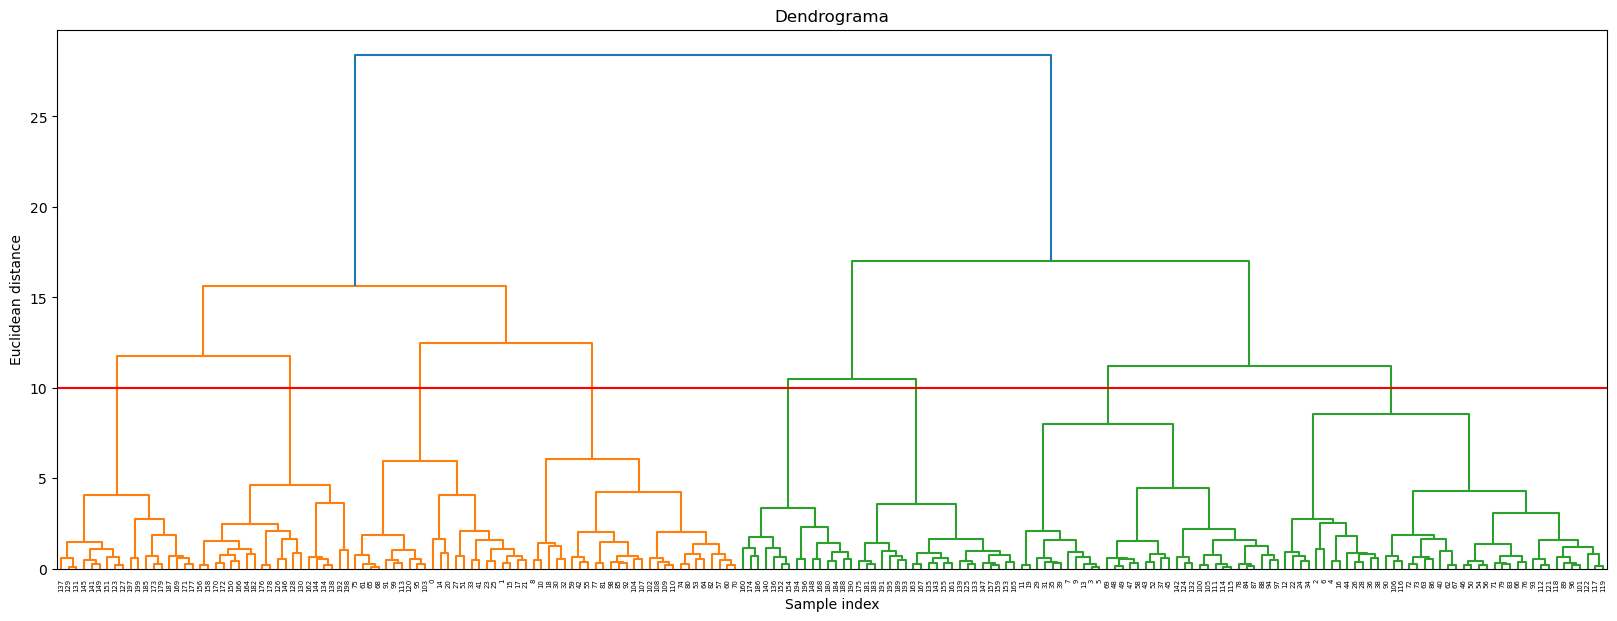

In [32]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [33]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 0], dtype=int64)

In [34]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

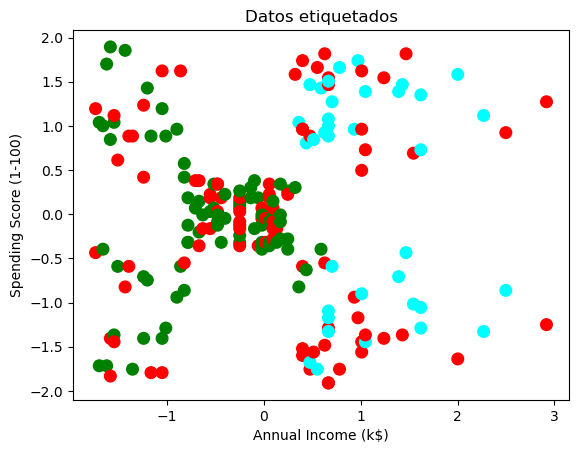

In [38]:
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [39]:
def plot_dendrogram(model, **kwargs):
    '''
    This function extracts the information from an AgglomerativeClustering model
    and plots its dendrogram with the dendrogram function from scipy.cluster.hierarchy
    '''
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()

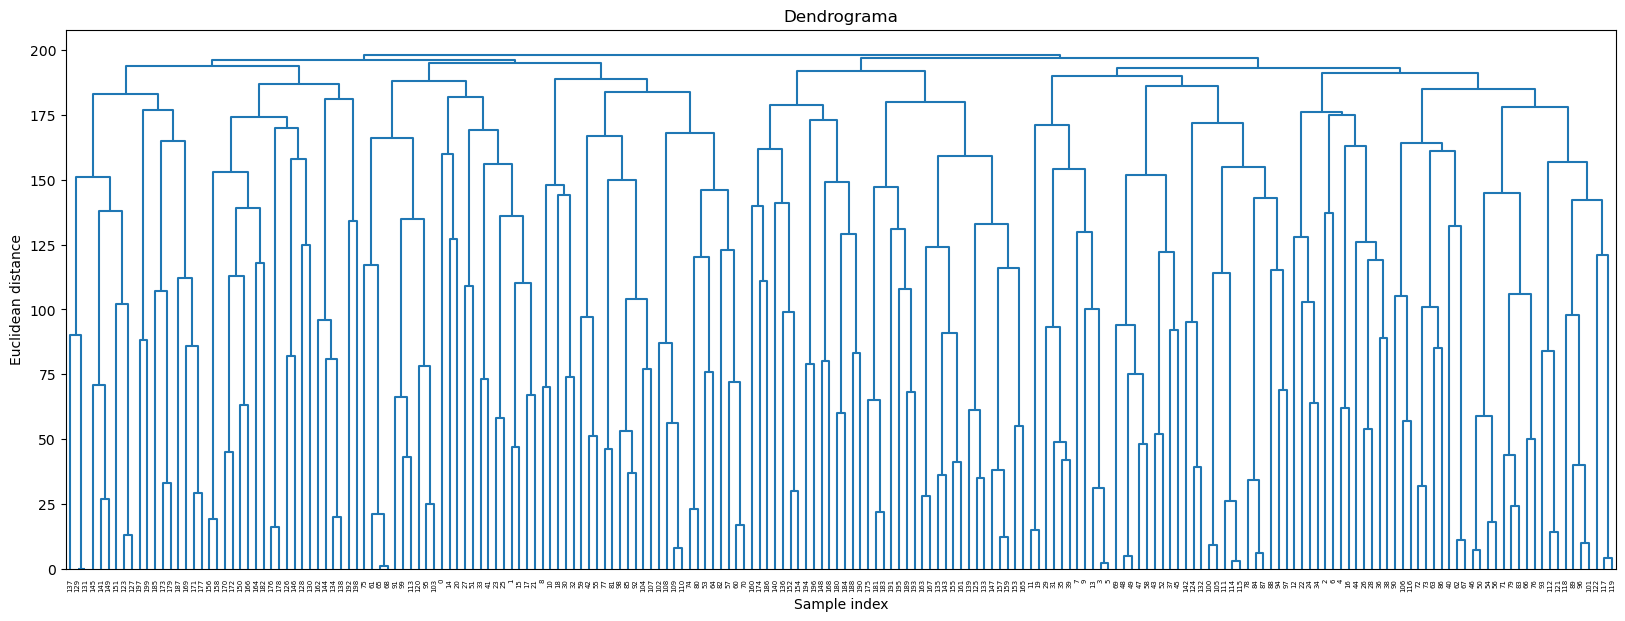

In [40]:
plot_dendrogram(hier_clustering, color_threshold=0)

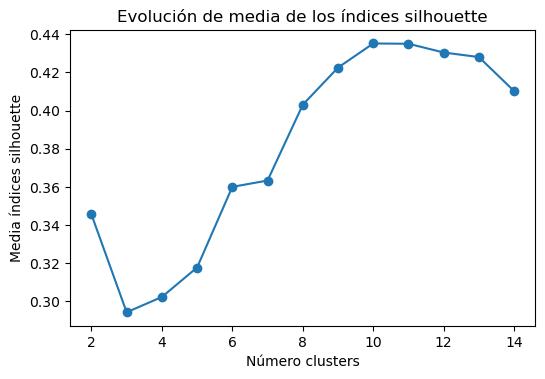

In [41]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [42]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.29413458137857573
Índice de Calinski-Harabasz: 82.65909808126932
Davies-Bouldin Index: 1.1761296367359801


In [43]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.7147045006128041, array([ 4.05770035, 28.37998088, 28.37998088, ..., 11.76169085,
        0.56583001, 11.76169085]))
